In [2]:
# !pip install scipy
# !pip install matplotlib
# !pip install seaborn

In [73]:
import numpy as np         # библиотека для матриц и математики
import pandas as pd        # библиотека для работы с табличками
from scipy import stats    # модуль для работы со статистикой

import matplotlib.pyplot as plt
import seaborn as sns

# стиль графиков
plt.style.use('ggplot')    
# plt.style.use('fivethirtyeight')
%matplotlib inline

# Датасет

## Предметная область

В этой тетрадке мы проанализируем логи покупок онлайн-магазина, продающего атрибутику компании Google.

Логи - это файлы с записью различных событий в хронологическом порядке. Обычно, все действия пользователя в различных сервисах подробно логируются. Именно по логам в дальнейшем аналитики считают различные метрики и строят модели.e.

## Источник данных

https://www.kaggle.com/c/ga-customer-revenue-prediction/data?select=train.csv

В соревновании, из которого взяты данные, предполагается задача предсказания выручки (Revenue Prediction).

### Характер данных

Реальные (см. выше)

In [ ]:
df = pd.read_csv('google_log.csv', sep='\t', index_col=False, engine='python')

df['totals.transactionRevenue'] = df['totals.transactionRevenue']/10**6

print(df.shape)
df.head()

## Описание атрибутов:

- `date` дата посещения сайта (рассматривается период с 20160801 по 20170801)
- `fullVisitorId` уникальный id пользователя
- `sessionId` уникальный id одной пользовательской сессии
- `channelGrouping` откуда произошёл переход
- `visitStartTime` timestamp начала визита
- `device.browser` браузер визита
- `device.operatingSystem` операционная система устройства
- `device.isMobile` является ли устройство мобильным
- `device.deviceCategory` тип устройства (айпад, компьютер, мобильный телефон)
- `geoNetwork.subContinent` часть света пользователя
- `geoNetwork.country` страна пользователя
- `geoNetwork.region` регион пользователя
- `geoNetwork.city` город пользователя
- `totals.hits` действия на сайте
- `totals.pageviews` просмотры страниц
- `totals.transactionRevenue` выручка с покупки
- `trafficSource.source` источник трафика
- `trafficSource.medium` более высокоуровневый источник трафика
- `trafficSource.keyword` ключевые слова из поиска
- `trafficSource.adwordsClickInfo.adNetworkType` несколько переменных с дополнительной информацией из adwords
- `trafficSource.adwordsClickInfo.page`
- `trafficSource.adwordsClickInfo.slot`
- `trafficSource.adwordsClickInfo.isVideoAd` 
- `trafficSource.adContent`

Для того, чтобы "взглянуть" что из себя представляют данныне, составим сводную таблицу.

In [31]:
output = []

for col in df.columns:

    Null  = np.sum(pd.isna(df[col])) / len(df) * 100
    unique = df[col].nunique()
    colType = str(df[col].dtype)

    values_head = df[col].unique()[:10]

    output.append([col, Null, unique, colType, values_head])

output = pd.DataFrame(output)  
output.columns = ['colName','null values %', 'unique', 'dtype', 'unique_values_examples']

In [32]:
output

,colName,null values %,unique,dtype,unique_values_examples
0,date,0.000000,366,datetime64[ns],"[2016-09-02 00:00:00, 2017-01-26 00:00:00, 201..."
1,fullVisitorId,0.000000,714167,object,"[1131660440785968503, 377306020877927890, 3895..."
2,sessionId,0.000000,902755,object,"[1131660440785968503_1472830385, 3773060208779..."
3,channelGrouping,0.000000,8,category,"['Organic Search', 'Referral', 'Paid Search', ..."
4,visitStartTime,0.000000,887159,datetime64[ns],"[2016-09-02 15:33:05, 2016-09-03 05:22:27, 201..."
5,device.browser,0.000000,54,category,"['Chrome', 'Firefox', 'UC Browser', 'Internet ..."
6,device.operatingSystem,0.000000,20,category,"['Windows', 'Macintosh', 'Linux', 'Android', '..."
7,device.isMobile,0.000000,2,bool,"[False, True]"
8,device.deviceCategory,0.000000,3,category,"['desktop', 'mobile', 'tablet'] Categories (3,..."
9,geoNetwork.subContinent,0.000000,23,category,"['Western Asia', 'Australasia', 'Southern Euro..."


In [7]:
df[df.columns[0:8]].head()

,date,fullVisitorId,sessionId,channelGrouping,visitStartTime,device.browser,device.operatingSystem,device.isMobile
0,20160902,1131660440785968503,1131660440785968503_1472830385,Organic Search,1472830385,Chrome,Windows,False
1,20160902,377306020877927890,377306020877927890_1472880147,Organic Search,1472880147,Firefox,Macintosh,False
2,20160902,3895546263509774583,3895546263509774583_1472865386,Organic Search,1472865386,Chrome,Windows,False
3,20160902,4763447161404445595,4763447161404445595_1472881213,Organic Search,1472881213,UC Browser,Linux,False
4,20160902,27294437909732085,27294437909732085_1472822600,Organic Search,1472822600,Chrome,Android,True


Преобразуем типы атрибутов к соответсвующим.

In [8]:
df['date'] = pd.to_datetime(df['date'], format='%Y%m%d')
df['visitStartTime'] = pd.to_datetime(df['visitStartTime'], unit='s')

categorical_cols = ['channelGrouping',
                    'device.browser',
                    'device.operatingSystem',
                    'device.deviceCategory',
                    'geoNetwork.subContinent',
                    'geoNetwork.country',
                    'trafficSource.medium', 
                   ]

df[categorical_cols] = df[categorical_cols].astype('category')

df['device.isMobile'] = df['device.isMobile'].astype('bool')

In [9]:
df[df.columns[9:17]].head()

,geoNetwork.subContinent,geoNetwork.country,geoNetwork.region,geoNetwork.city,totals.hits,totals.pageviews,totals.transactionRevenue,trafficSource.source
0,Western Asia,Turkey,Izmir,Izmir,1,1.0,NaN,google
1,Australasia,Australia,not available in demo dataset,not available in demo dataset,1,1.0,NaN,google
2,Southern Europe,Spain,Community of Madrid,Madrid,1,1.0,NaN,google
3,Southeast Asia,Indonesia,not available in demo dataset,not available in demo dataset,1,1.0,NaN,google
4,Northern Europe,United Kingdom,not available in demo dataset,not available in demo dataset,1,1.0,NaN,google


In [10]:
df['totals.hits'] = df['totals.hits'].astype('int')
df['totals.pageviews'] = df['totals.pageviews'].astype('Int32')
df['totals.transactionRevenue'] = df['totals.transactionRevenue'].astype('float')

In [11]:
df[df.columns[18:24]].head()

,trafficSource.keyword,trafficSource.adwordsClickInfo.adNetworkType,trafficSource.adwordsClickInfo.page,trafficSource.adwordsClickInfo.slot,trafficSource.adwordsClickInfo.isVideoAd,trafficSource.adContent
0,(not provided),NaN,NaN,NaN,NaN,NaN
1,(not provided),NaN,NaN,NaN,NaN,NaN
2,(not provided),NaN,NaN,NaN,NaN,NaN
3,google + online,NaN,NaN,NaN,NaN,NaN
4,(not provided),NaN,NaN,NaN,NaN,NaN


In [12]:
df.dtypes

date                                            datetime64[ns]
fullVisitorId                                           object
sessionId                                               object
channelGrouping                                       category
visitStartTime                                  datetime64[ns]
device.browser                                        category
device.operatingSystem                                category
device.isMobile                                           bool
device.deviceCategory                                 category
geoNetwork.subContinent                               category
geoNetwork.country                                    category
geoNetwork.region                                       object
geoNetwork.city                                         object
totals.hits                                              int32
totals.pageviews                                         Int32
totals.transactionRevenue                              

In [86]:
df.to_csv("logs_proccesed.csv", index=False)

## Описательные статистики

In [13]:
df[['totals.hits', 'totals.pageviews', 'totals.transactionRevenue']].describe()

,totals.hits,totals.pageviews,totals.transactionRevenue
count,903653.000000,903553.0,11515.000000
mean,4.596538,3.849764,133.744789
std,9.641437,7.025274,448.285227
min,1.000000,1.0,0.010000
25%,1.000000,1.0,24.930000
50%,2.000000,1.0,49.450000
75%,4.000000,4.0,107.655000
max,500.000000,469.0,23129.500000


## Гистограмма распределения значений, определение выбросов

array([[<Axes: title={'center': 'totals.hits'}>,
        <Axes: title={'center': 'totals.pageviews'}>],
       [<Axes: title={'center': 'totals.transactionRevenue'}>, <Axes: >]],
      dtype=object)

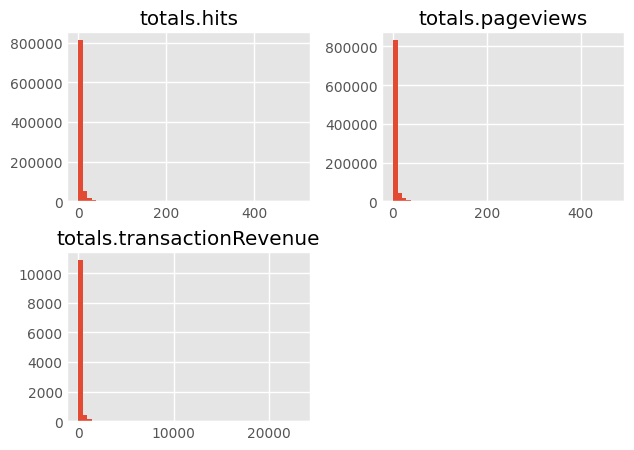

In [75]:
num_cols = ['totals.hits', 'totals.pageviews', 'totals.transactionRevenue']
df[num_cols].hist(bins=50)

Видим, что распределение сильно скошено влево.

Отсечем выбросы с помощью 0.99 квантиля.

<Axes: >

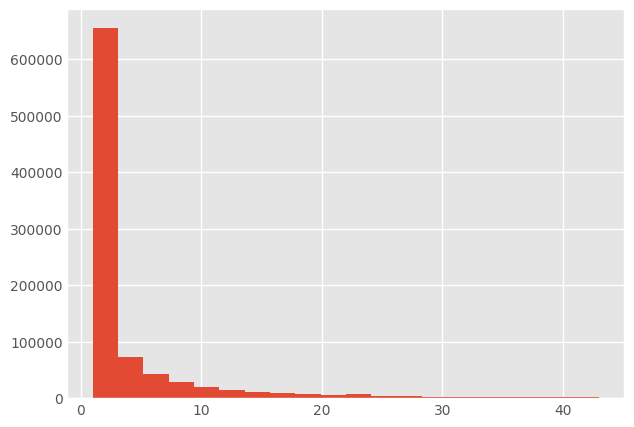

In [82]:
q_hits = df['totals.hits'].quantile(0.99)
df['totals.hits'][df['totals.hits'] < q_hits].hist(bins=20)

<Axes: >

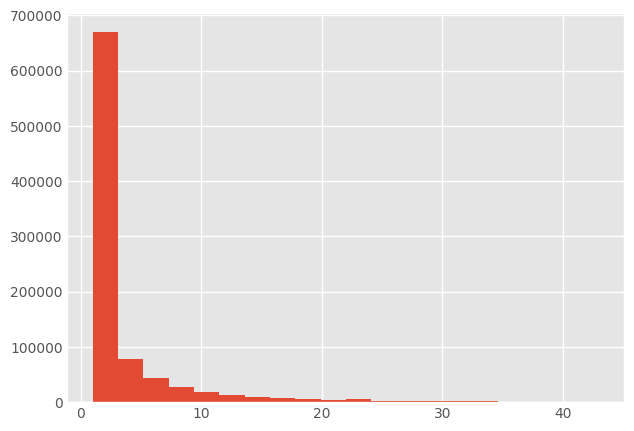

In [83]:
q_pageviews = df['totals.pageviews'].quantile(0.99)
df['totals.pageviews'][df['totals.pageviews'] < q].hist(bins=20)

<Axes: >

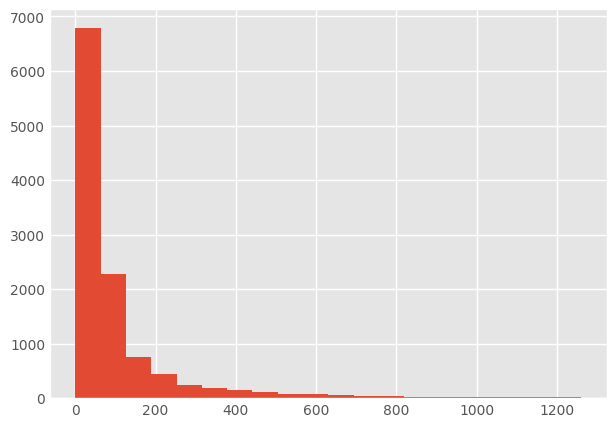

In [80]:
q_transactionRevenue = df['totals.transactionRevenue'].quantile(0.99)
df['totals.transactionRevenue'][df['totals.transactionRevenue'] < q_transactionRevenue].hist(bins=20)

Распределение продаж так же сильно скошено в лево и отличается и даже близко не похоже на нормальное. При этом, это важный атрибут, который в будущем может быть использован, например, в линейной регрессии. В таком случае, лучше привести его с помощью логарифмирования к более "нормальному" виду.

Text(0.5, 0, 'Логарифм выручки')

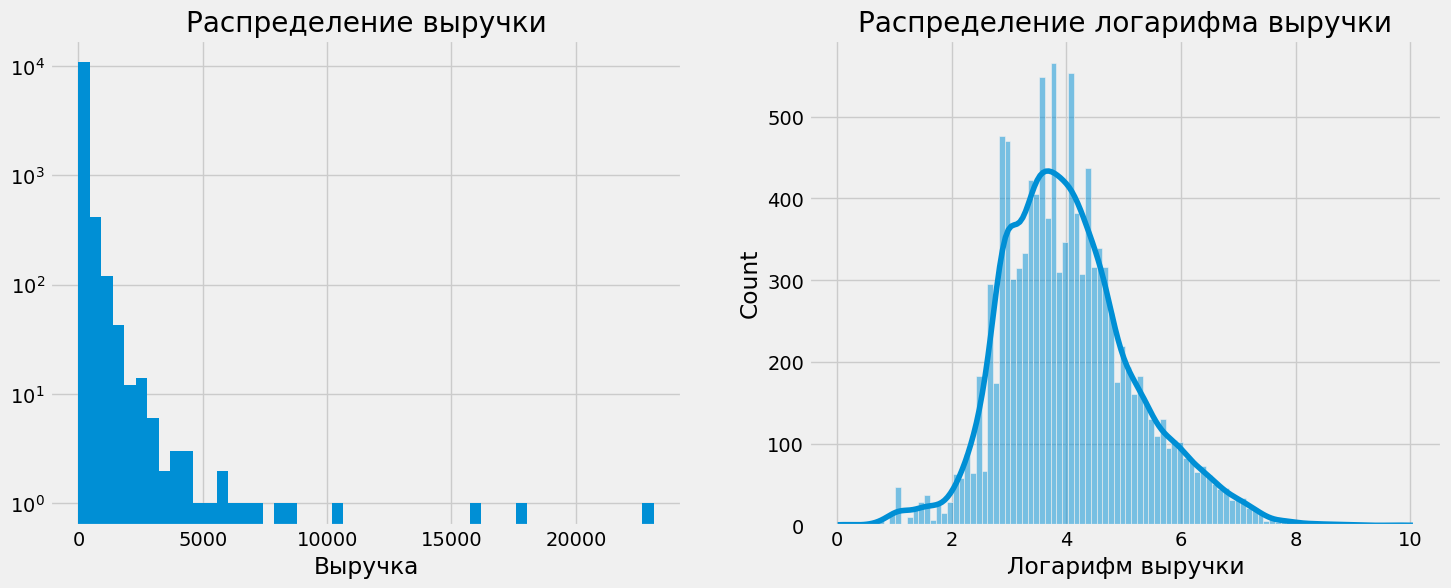

In [45]:
fig, axes = plt.subplots(1, 2, figsize=(16,6))

df['totals.transactionRevenue'].hist(bins=50, log=True, ax=axes[0])
sns.histplot(
    np.log(df['totals.transactionRevenue'] + 1), 
    ax=axes[1], 
    bins=100, 
    kde=True)

axes[0].set_title("Распределение выручки")
axes[0].set_xlabel("Выручка")

axes[1].set_title("Распределение логарифма выручки")
axes[1].set_xlabel("Логарифм выручки")

## Пропущенные значения

В предудущих пунктах уже была построена сводная таблица, в которой присутсвовал столбец с процентом пропущенных значений. Выведем его.


In [87]:
output[output['null values %']> 0]

,colName,null values %,unique,dtype,unique_values_examples
14,totals.pageviews,0.011066,213,Int32,"[1, 2, 3, 4, 5, 6, 7, 8, 9, 10]"
15,totals.transactionRevenue,98.725728,5332,float64,"[nan, 37.86, 306.67, 68.03, 26.25, 574.15, 8.3..."
18,trafficSource.keyword,55.655102,3659,object,"[(not provided), google + online, nan, www goo..."
19,trafficSource.adwordsClickInfo.adNetworkType,97.625195,2,object,"[nan, Google Search, Search partners]"
20,trafficSource.adwordsClickInfo.page,97.625195,8,float64,"[nan, 1.0, 5.0, 3.0, 2.0, 14.0, 7.0, 9.0, 4.0]"
21,trafficSource.adwordsClickInfo.slot,97.625195,2,object,"[nan, Top, RHS]"
22,trafficSource.adwordsClickInfo.isVideoAd,97.625195,1,object,"[nan, False]"
23,trafficSource.adContent,98.788694,44,object,"[nan, Full auto ad IMAGE ONLY, First Full Auto..."


Визуализируем пропуски в различных колонках. Сделаем случайную подвыборку в 5000
 стро (так как датасет содержит слишком много строк, чтобы визуализировать все)к и раскрасим пропуски в жёлтый.

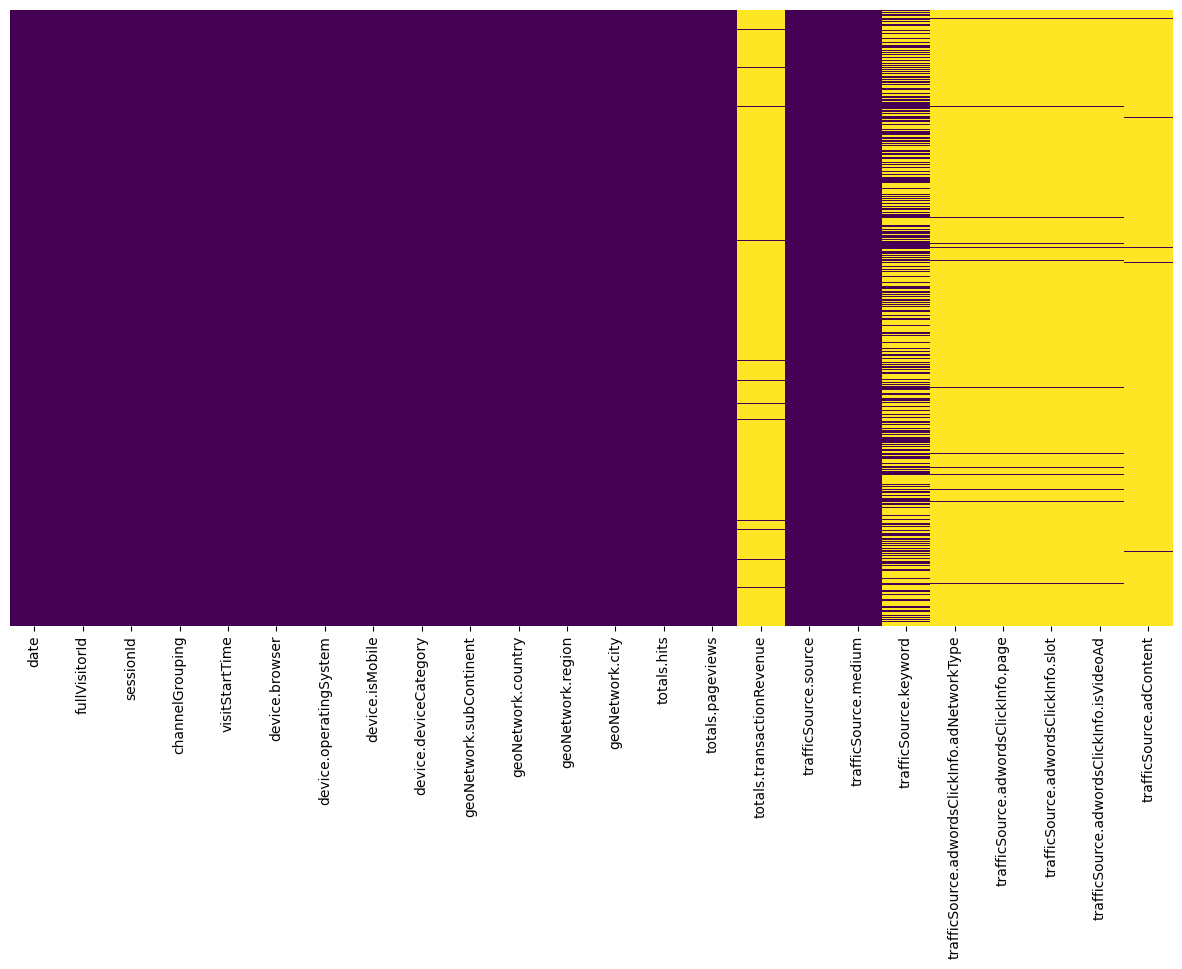

In [35]:
fig, ax = plt.subplots(figsize=(15,8))

sns_heatmap = sns.heatmap(df.sample(5000).isnull(), 
                          yticklabels=False, 
                          cbar=False, 
                          cmap='viridis')

## Варианты обработки пропущенных значений

- totals.pageviews: Процент пропущенных значений очень маленький (0.0111%), поэтому можно рассмотреть их удаление или заполнение медианным значением.
- totals.transactionRevenue: Очень высокий процент пропусков (98.7257%). Учитывая, что это финансовый столбец, можно заменить их на 0, если отсутствие значения может быть интерпретировано как отсутствие транзакции.
- trafficSource.keyword: Заполнить пропущенные значения, например, меткой "unknown" или "not provided".
- trafficSource.adwordsClickInfo.adNetworkType, trafficSource.adwordsClickInfo.slot, trafficSource.adwordsClickInfo.isVideoAd: Учитывая, что у большинства пропущенных значений очень высокий процент (более 97%), эти столбцы могут быть удалены, так как они могут не предоставлять информационной ценности, зависит от задачи.
- trafficSource.adwordsClickInfo.page: Заполнить пропуски nan'ами.
- trafficSource.adContent: Заполнить пропущенные значения, например, меткой "unknown".

### Пример удаления и заполнения пропущенных значений

```
df.dropna(subset=['totals.transactionRevenue'], inplace=True)

df['trafficSource.keyword'].fillna('not provided', inplace=True)
df['totals.pageviews'].fillna(df['totals.pageviews'].median(), inplace=True

df.drop(columns=['trafficSource.adwordsClickInfo.adNetworkType', 'trafficSource.adwordsClickInfo.slot', 'trafficSource.adwordsClickInfo.isVideoAd'], inplace=True)
`````

## Определить корреляцию между параметрами

К сожалению, в выбранном датасете мало численных данных, которые можно проанализировать на корреляцию.

In [52]:
num_cols

['totals.hits', 'totals.pageviews', 'totals.transactionRevenue']

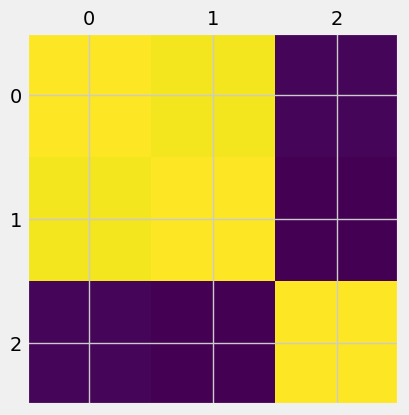

In [58]:
plt.matshow(df[num_cols].corr())
plt.show()

Таким образом, высокоррелированы параметры 'totals.hits', 'totals.pageviews'. Не коррелированн с ними параметр totals.transactionRevenue.

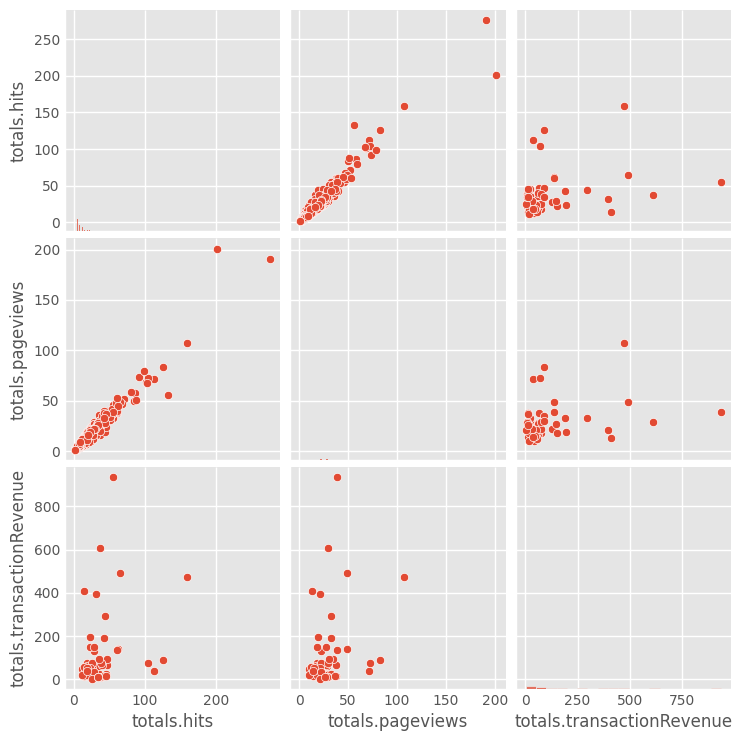

In [76]:
sns.pairplot(df[num_cols].sample(5000))

## Вывод

Видим, что построенных графиков не хватает для подробного EDA. Поскольку это финансовые данные магазина с отметками времени, для более подробного и предметного анализа стоило бы так же рассмотреть возращаемость пользователей и посещаемость сайта. Так же можно разбить данные по месяцам и смотреть средние показатели по месяцам/дням недели/часам, сравнить дату первого визита и первой покупки, проанализировать выручку в разбивке по истосточниками (браузеры, регионы, операционные системы).